In [1]:
import pandas as pd
df = pd.read_csv('Employee Rating.csv', index_col = ['Employee ID','Employee Name', 'Date'])
df.head(5)

Active Start Time  Active Screen Time  \
Employee ID Employee Name Date                                               
1           Lisa Green    2023-01-01             08:01                1.50   
                          2023-01-02             09:02                3.30   
                          2023-01-03             08:12                4.93   
                          2023-01-04             09:32                4.24   
                          2023-01-05             09:37                2.10   

                                      Active Collaboration Time  Social Time  \
Employee ID Employee Name Date                                                 
1           Lisa Green    2023-01-01                       1.55         1.71   
                          2023-01-02                       1.40         0.58   
                          2023-01-03                       1.63         1.93   
                          2023-01-04                       1.24         1.97   
                          2023-01-05                       1.11         0.79   

                                      Percentage of Task Closed       Role  \
Employee ID Employee Name Date                                               
1           Lisa Green    2023-01-01                         81  Developer   
                          2023-01-02                         61  Developer   
                          2023-01-03                         77  Developer   
                          2023-01-04                         60  Developer   
                          2023-01-05                         67  Developer   

                                      Rating  
Employee ID Employee Name Date                
1           Lisa Green    2023-01-01       3  
                          2023-01-02       2  
                          2023-01-03       3  
                          2023-01-04       3  
                          2023-01-05       2

In [2]:
# convert all the categorical columns in the dataset to numerical values
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df

In [3]:
df = label_encode(df)

In [4]:
df.head()

Active Start Time  Active Screen Time  \
Employee ID Employee Name Date                                                
1           Lisa Green    2023-01-01                  1                1.50   
                          2023-01-02                 62                3.30   
                          2023-01-03                 12                4.93   
                          2023-01-04                 92                4.24   
                          2023-01-05                 97                2.10   

                                      Active Collaboration Time  Social Time  \
Employee ID Employee Name Date                                                 
1           Lisa Green    2023-01-01                       1.55         1.71   
                          2023-01-02                       1.40         0.58   
                          2023-01-03                       1.63         1.93   
                          2023-01-04                       1.24         1.97   
                          2023-01-05                       1.11         0.79   

                                      Percentage of Task Closed  Role  Rating  
Employee ID Employee Name Date                                                 
1           Lisa Green    2023-01-01                         81     1       3  
                          2023-01-02                         61     1       2  
                          2023-01-03                         77     1       3  
                          2023-01-04                         60     1       3  
                          2023-01-05                         67     1       2

<Axes: >

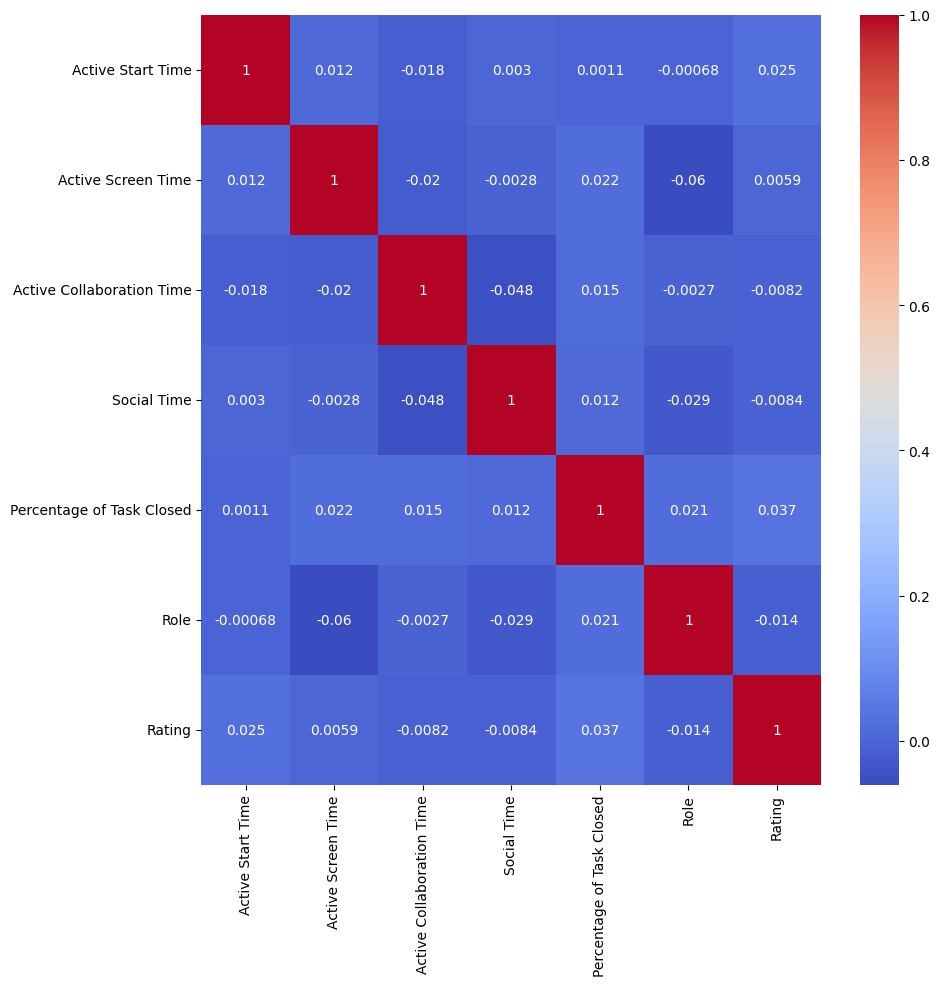

In [5]:
# use spearman correlation to find the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# create a correlation matrix
corr = df.corr(method='spearman')
# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [6]:
# do the train test split
from sklearn.model_selection import train_test_split
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = rfc.predict(X_test)

In [9]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [10]:
print(round(mae, 2))

1.18


In [11]:
import joblib
joblib.dump(rfc, 'RandomForest.joblib')

['RandomForest.joblib']

In [12]:
X_features = list( df.columns )
X_features.remove( "Rating" )

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split( df[X_features],
                                    df.Rating,
                                    test_size = 0.3,
                                    random_state = 100 )

In [14]:
import warnings
warnings.filterwarnings("ignore")
import eli5.sklearn
eli5.explain_weights( 
    rfc, 
    feature_names = X_features )

Weight,Feature
0.2025 ± 0.0423,Active Screen Time
0.1877 ± 0.0366,Social Time
0.1855 ± 0.0361,Active Collaboration Time
0.1817 ± 0.0357,Active Start Time
0.1617 ± 0.0347,Percentage of Task Closed
0.0810 ± 0.0254,Role


In [15]:
X_test.iloc[0]

Active Start Time            92.00
Active Screen Time            2.63
Active Collaboration Time     1.27
Social Time                   0.26
Percentage of Task Closed    76.00
Role                          4.00
Name: (12, Mike Lee, 2023-03-04), dtype: float64

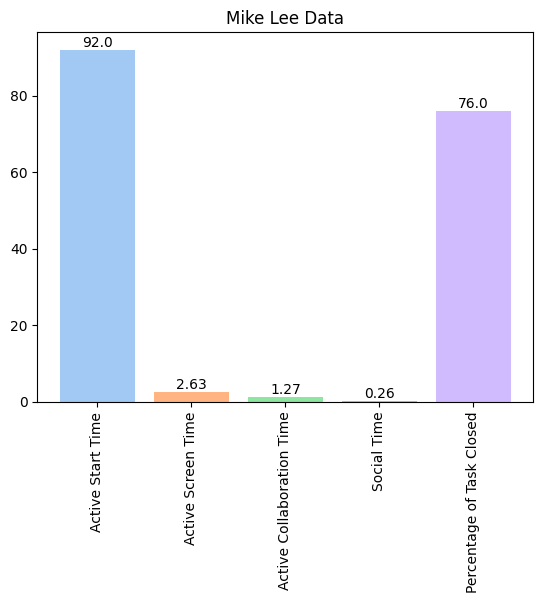

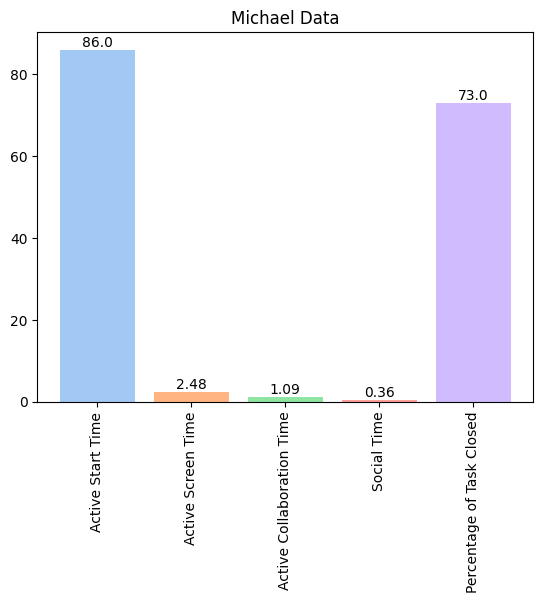

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['red', 'green', 'blue', 'yellow', 'orange']
colors = sns.color_palette('pastel')

# Define data for original bar graph
x = X_test.iloc[0].drop(['Role']).index
y = X_test.iloc[0].drop(['Role']).values

# Create original bar graph
fig, ax = plt.subplots()
bars = ax.bar(x, y, color=colors[:5])
ax.set_title('Mike Lee Data')
plt.xticks(rotation=90)

# Add text annotations on bars
for i, v in enumerate(y):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Define data for new bar graph
x2 = X_test.iloc[0].drop(['Role']).index
y2 = [86.0, 2.48, 1.09, 0.36, 73.0]

# Create new bar graph
fig, ax2 = plt.subplots()
bars2 = ax2.bar(x2, y2, color=colors[:5])
ax2.set_title('Michael Data')
plt.xticks(rotation=90)

# Add text annotations on bars
for i, v in enumerate(y2):
    ax2.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Show plots
plt.show()


In [17]:
eli5.show_prediction( rfc,
                         X_test.iloc[0],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [18]:
eli5.show_prediction( rfc,
                         X_test.iloc[1],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [19]:
eli5.show_prediction( rfc,
                         X_test.iloc[2],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [20]:
eli5.show_prediction( rfc,
                         X_test.iloc[3],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )
